EDA and 98% accuracy
Python · Comprehensive Diabetes Clinical Dataset(100k rows)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("D:\HealthCare Project\diabetes_dataset.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  int64  
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [34]:
df.shape

(100000, 16)

In [35]:
df = df.drop('year', axis=1)
df = df.drop('location', axis=1)

df.shape

(100000, 14)

In [36]:
df.describe()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885790,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.517039,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885790,22.517039,0.00,24.00,43.00,60.00,80.00
race:AfricanAmerican,100000.0,0.202230,0.401665,0.00,0.00,0.00,0.00,1.00
race:Asian,100000.0,0.200150,0.400114,0.00,0.00,0.00,0.00,1.00
race:Caucasian,100000.0,0.198760,0.399069,0.00,0.00,0.00,0.00,1.00
race:Hispanic,100000.0,0.198880,0.399160,0.00,0.00,0.00,0.00,1.00
race:Other,100000.0,0.199980,0.399987,0.00,0.00,0.00,0.00,1.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
hbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'race:AfricanAmerican'}>,
        <Axes: title={'center': 'race:Asian'}>],
       [<Axes: title={'center': 'race:Caucasian'}>,
        <Axes: title={'center': 'race:Hispanic'}>,
        <Axes: title={'center': 'race:Other'}>],
       [<Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'hbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

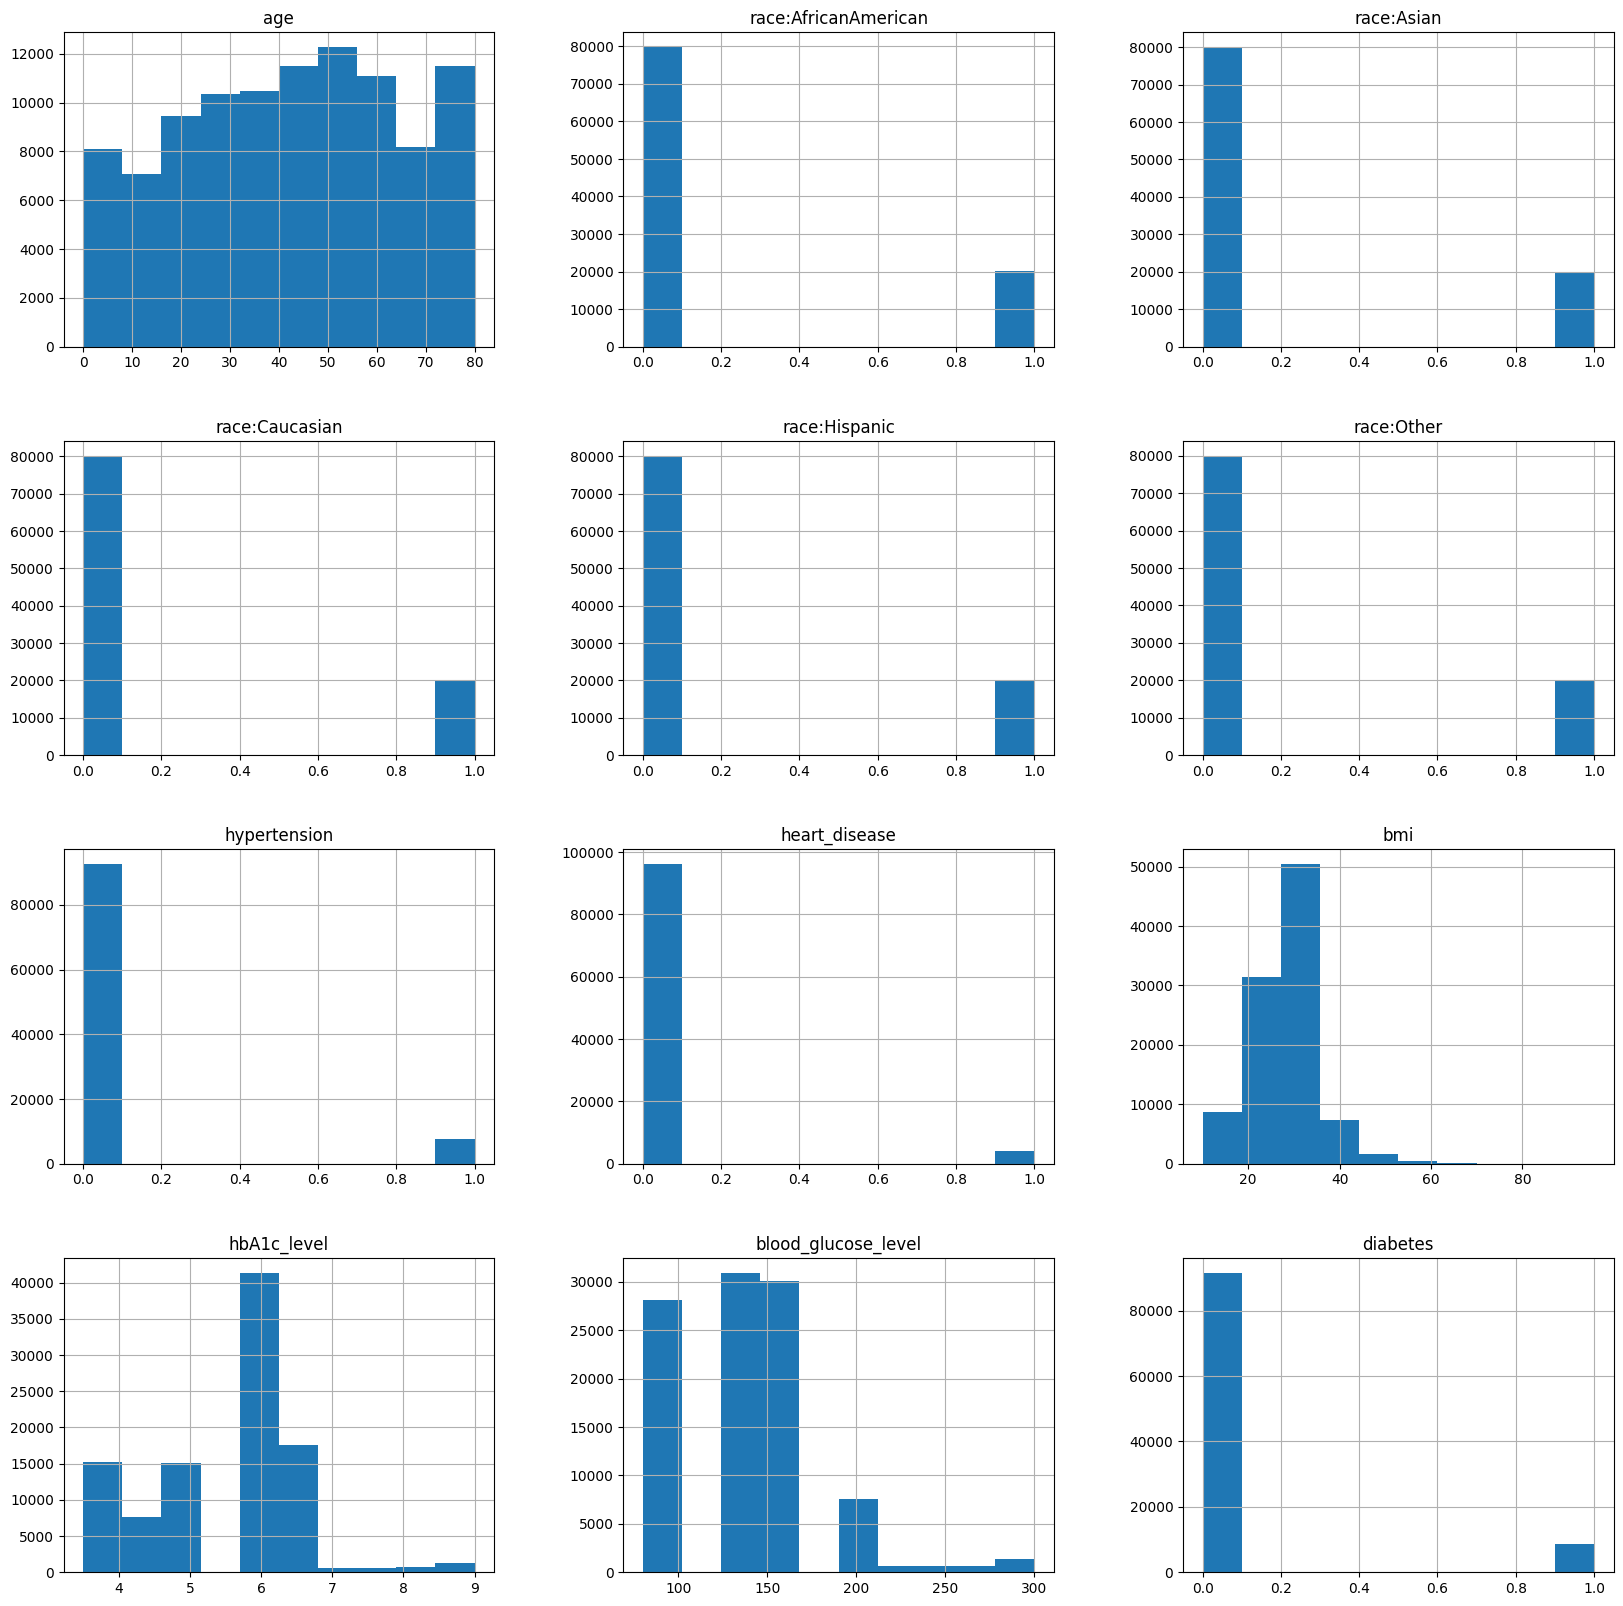

In [38]:
df.hist(figsize=(20,20),bins=10)

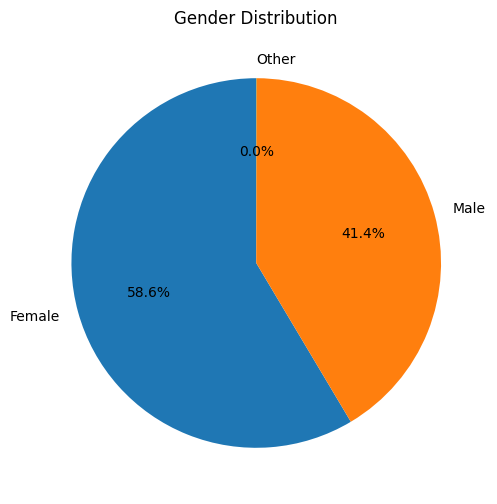

In [39]:
fig=plt.figure(figsize=(10,6))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

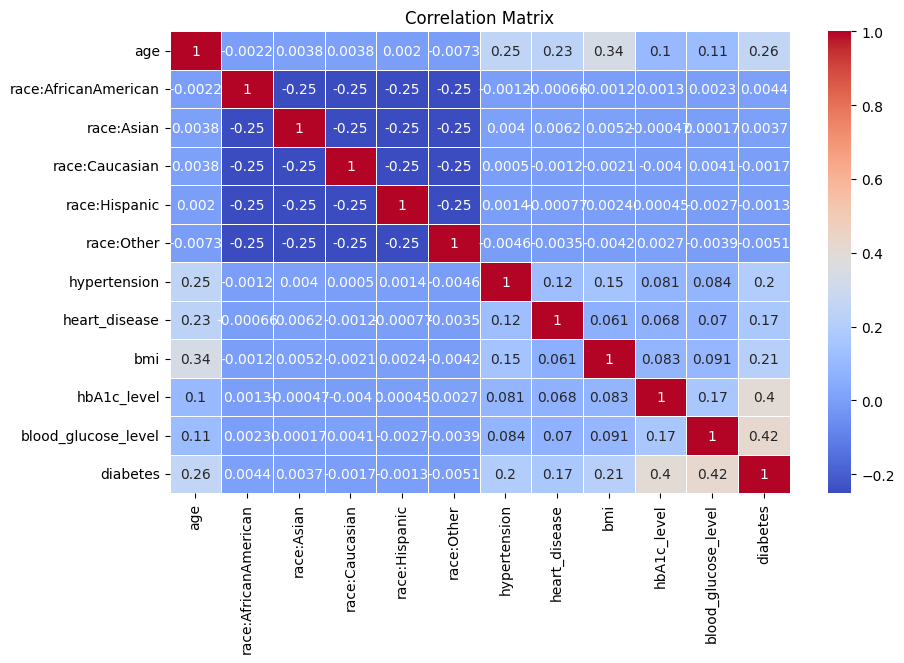

In [40]:
numeric_df=df.select_dtypes(include=[np.number])
fig=plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
#df['location'].value_counts()

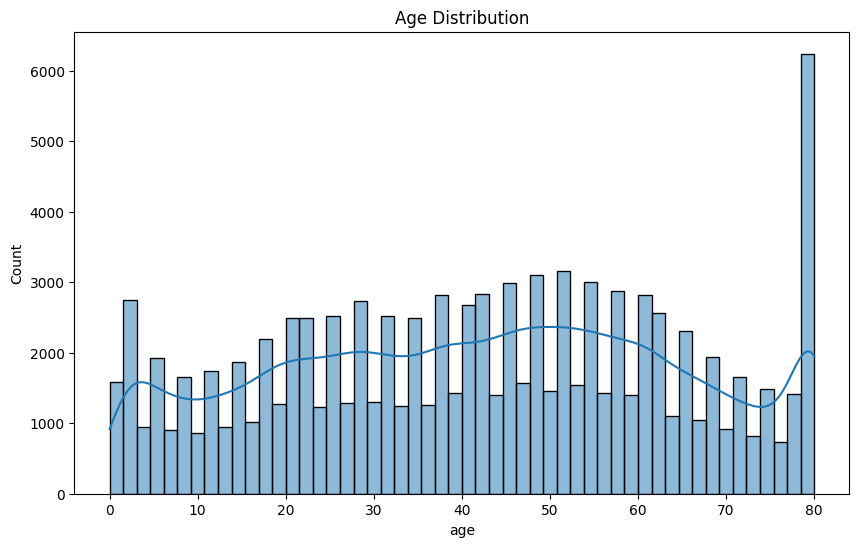

In [11]:
fig=plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

In [12]:
race_counts = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']].sum()
print(race_counts)

race:AfricanAmerican    20223
race:Asian              20015
race:Caucasian          19876
race:Hispanic           19888
race:Other              19998
dtype: int64


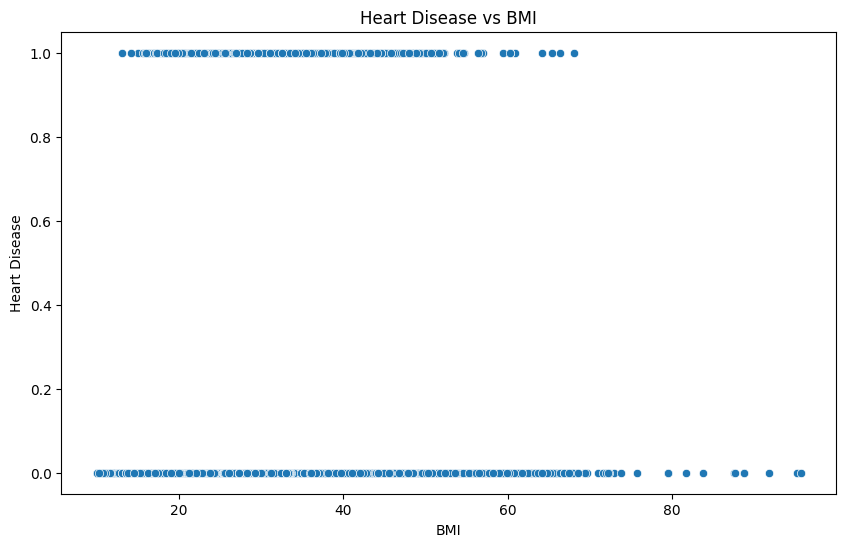

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='heart_disease')
ax.set_xlabel('BMI')
ax.set_ylabel('Heart Disease')
ax.set_title('Heart Disease vs BMI')
plt.show()

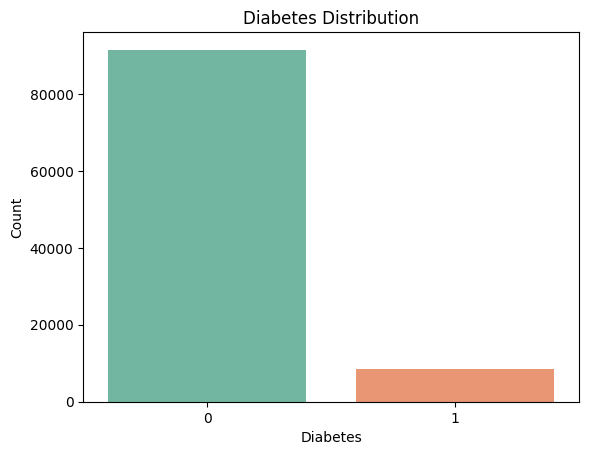

In [14]:
# fig = plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='diabetes')
# plt.title('Diabetes Distribution')
# plt.xlabel('Diabetes')
# plt.ylabel('Count')
# plt.show()

# Using a color palette
sns.countplot(data=df, x='diabetes', palette='Set2')  # You can change 'Set2' to any other palette

plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['location']=le.fit_transform(df['location'])
df['smoking_history']=le.fit_transform(df['smoking_history'])
df.rename(columns={'race:AfricanAmerican': 'africanamerican'}, inplace=True)
df.rename(columns={'race:Caucasian': 'caucasian'}, inplace=True)
df.rename(columns={'race:Hispanic': 'hispanic'}, inplace=True)
df.rename(columns={'race:Asian': 'asian'}, inplace=True)
df.rename(columns={'race:Other': 'other'}, inplace=True)
smote=SMOTE()
X=df.drop('diabetes',axis=1)
y=df['diabetes']
X,y=smote.fit_resample(X,y)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Logistic Regression 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)



In [26]:

# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)


[LightGBM] [Info] Number of positive: 73112, number of negative: 73288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 146400, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499399 -> initscore=-0.002404
[LightGBM] [Info] Start training from score -0.002404


In [27]:

# XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)



In [28]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


In [29]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


In [30]:

print("Logistic Regression Accuracy " ,logreg_accuracy)
print(" LightGBM: ", lgbm_accuracy)
print("XGBoost: ", xgb_accuracy)
print("Decision Tree: ", dt_accuracy)
print(" Random Forest : ", rf_accuracy)
#lgbm_accuracy, xgb_accuracy, dt_accuracy, rf_accuracy

Logistic Regression Accuracy  0.9010655737704918
 LightGBM:  0.98224043715847
XGBoost:  0.981775956284153
Decision Tree:  0.9674863387978142
 Random Forest :  0.9821311475409836


Making prediction
i need to give input and get result


In [25]:

# # SVM
# svm = SVC()
# svm.fit(x_train, y_train)
# svm_pred = svm.predict(x_test)
# svm_accuracy = accuracy_score(y_test, svm_pred)



In [ ]:

logreg_accuracy, lgbm_accuracy, xgb_accuracy, dt_accuracy, rf_accuracy